# 1. 가설검정의 가정

- 가설검정을 수행하기 위해서는 데이터의 정규성, 등분산성, 독립성이 확인되어야 함

- 일반적으로 데이터 수집 시 독립성이 확보되므로 추가적 검정이 필요하지 않을 수 있지만 정규성과 등분산성은 별도의 검정 과정을 통해 확인해야 함

In [1]:
import warnings 
warnings.filterwarnings(action='ignore')

import sys 
import seaborn as sns 
from math import sqrt
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

In [2]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 9 
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 동일한 제품을 판매하는 서로 다른 두 지역 매장의 100일간 일별 매출액 가상 데이터

# 두 매장의 평균 매출액 비교
origin = pd.read_excel("../rawdata/store.xlsx")
origin

,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58
...,...,...
95,53,69
96,52,51
97,52,65
98,49,59


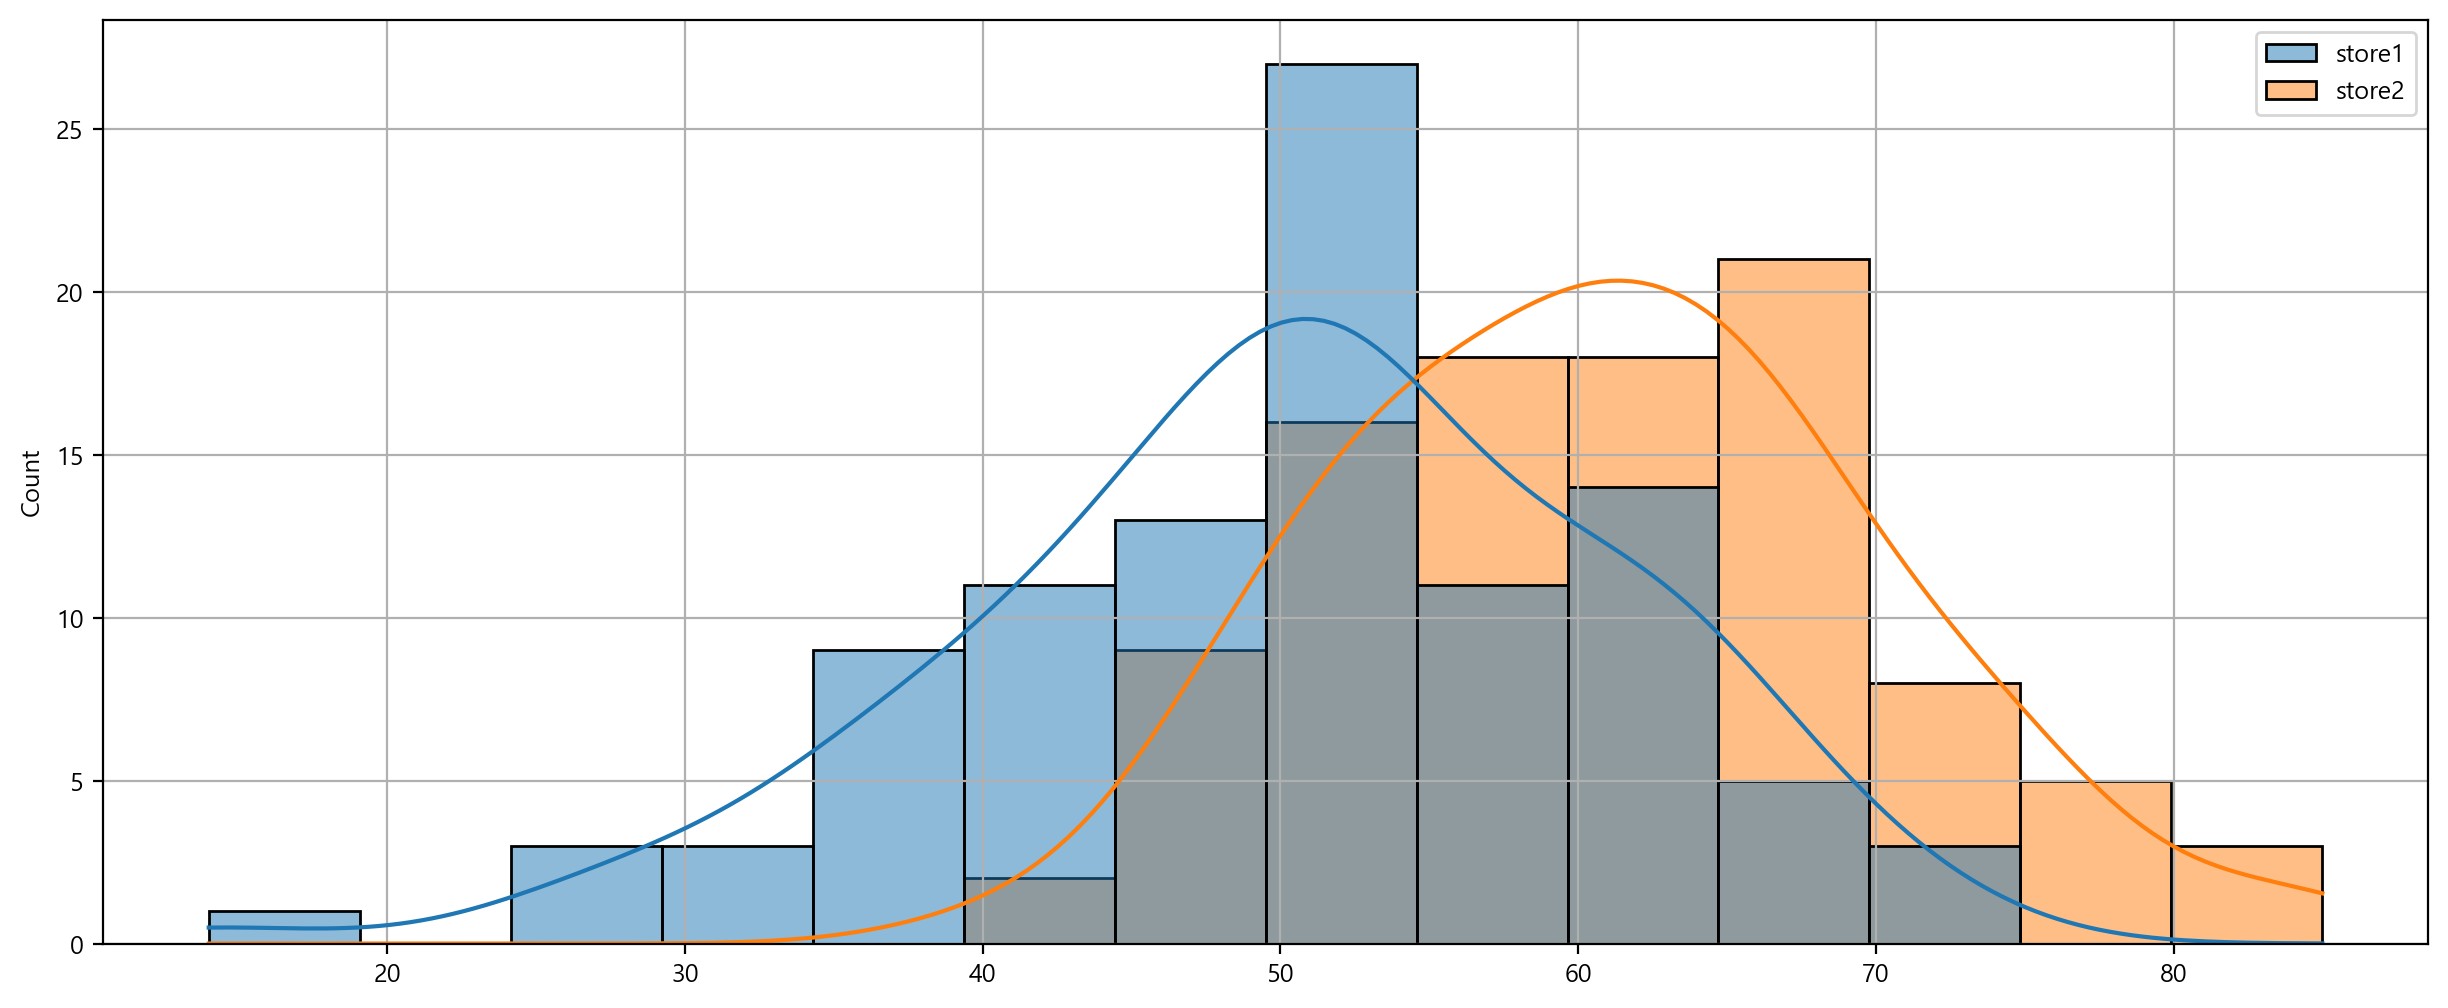

In [4]:
# 데이터 분포 확인
plt.figure()
sns.histplot(origin, kde=True)
plt.grid()
plt.show()

In [6]:
# 데이터 정규성 확인

# Shapiro Wilk 검정 
# 매우 엄격함

s, p = shapiro(origin['store1'])

"statistic: {0:.3f}, p-value {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>= 0.05)

'statistic: 0.979, p-value 0.109, 정규성 충족 여부: True'

In [7]:
# 데이터 정규성 확인

# Shapiro Wilk 검정 
# 매우 엄격함

s, p = shapiro(origin['store2'])

"statistic: {0:.3f}, p-value {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>= 0.05)

'statistic: 0.991, p-value 0.731, 정규성 충족 여부: True'

In [9]:
# Normal Test
s = skew(origin['store1'])
print("왜도: %0.3f" % s)
print("왜도의 절대값: %0.3f" % abs(s))

# 왜도의 절대값이 0.51이므로 정규성 충족

왜도: -0.506
왜도의 절대값: 0.506


In [10]:
k = kurtosis(origin['store1'])
print("첨도: %0.3f" % k)
print("첨도의 절대값: %0.3f" % abs(k))

# 첨도의 절대값이 7보다 작으므로 정규성 충족

첨도: 0.422
첨도의 절대값: 0.422


In [11]:
s, p = normaltest(origin['store1'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>=0.05)

'statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True'

In [12]:
s, p = normaltest(origin['store2'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>=0.05)

'statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True'

In [13]:
# 반복문으로 한 번에 처리하기

fmt = "[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}"

for c in origin.columns:
    s, p = normaltest(origin[c])
    print(fmt.format(c, s, p, p>=0.05))

[store1] statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True
[store2] statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True


In [14]:
# 데이터 등분산성 확인

# Barlett 검정 - 정규분포를 따르는 데이터의 집단 간 분산이 같은지 다른지 여부를 알아볼 때 사용

# 파라미터에 제한이 없음 
s, p = bartlett(origin['store1'], origin['store2'])
print("Bartlett 검정: statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>=0.05))

Bartlett 검정: statistic: 2.844, p-value: 0.092, 정규성 충족 여부: True


In [15]:
# 레빈 검정

# 데이터가 정규분포를 따르지 않을 경우 사용할 수 있는 방법

s, p = levene(origin['store1'], origin['store2'])
print("Levene 검정: statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>=0.05))

Levene 검정: statistic: 1.360, p-value: 0.245, 정규성 충족 여부: True


In [16]:
# 반복문으로 한번에 처리하기
normal_dist = True    # 정규성 반복 여부 
data = origin.copy()  # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(n, s, p, p>=0.05))

Bartlett 검정: statistic: 2.844, p-value: 0.092, 정규성 충족 여부: True
